## Cellposesam (cellpose 4) via Pixi

### Making Pixi Environment Visible in VS Code - Reminder

**Standard Setup: Register as Jupyter Kernel**
1. Navigate to your pixi environment folder (e.g., `pixi/microsam_cellposesam/`)
2. Run: `pixi run python -m ipykernel install --user --name=cellposesam --display-name "Python (microsam_cellposesam)"`
3. In VS Code, select the kernel from the dropdown

**If DLLs aren't loading correctly (CUDNN issues):**
You may need to launch VS Code from within pixi shell:
1. Navigate to environment folder: `cd pixi/microsam_cellposesam/`
2. Start pixi shell: `pixi shell`
3. Launch VS Code from shell: `code .`

**If you don't use VS Code:**
If you prefer Jupyter notebook instead of VS Code, launching from pixi shell might work for you (we haven't tested this):
1. Start pixi shell: `pixi shell` 
2. Launch Jupyter: `jupyter notebook`

**Environment Verification**
We print package versions below to verify the environment is working correctly. Pay special attention to CUDNN version - if it shows as unavailable, your paths may not be set correctly.

In [1]:
# First, test if environment is working correctly by checking versions
import torch
import numpy as np

print("Torch version:", torch.__version__)
print("NumPy version:", np.__version__)

print("CUDA available:", torch.cuda.is_available())
if torch.cuda.is_available():
    print("GPU name:", torch.cuda.get_device_name(0))

print("cuDNN available:", torch.backends.cudnn.is_available())
print("cuDNN version:", torch.backends.cudnn.version())

Torch version: 2.6.0
NumPy version: 2.3.4
CUDA available: True
GPU name: NVIDIA GeForce RTX 3090
cuDNN available: True
cuDNN version: 91002


## Import cellpose

... and check major version.  Version 4 is the sam version.  Earlier versions are built on unets. 

In [4]:
import cellpose
from cellpose import models, io

major_number = cellpose.version.split('.')[0]
print(f"Cellpose version: {cellpose.version} (major number: {major_number})")

if major_number == '3':
    model = models.Cellpose(gpu=True, model_type='cyto2')
elif major_number == '4':
    model = models.CellposeModel(gpu=True)


Cellpose version: 4.0.7 (major number: 4)


In [6]:
## Load and display example image

cell_00068
Loaded image shape: (1536, 2040, 3), dtype: uint8


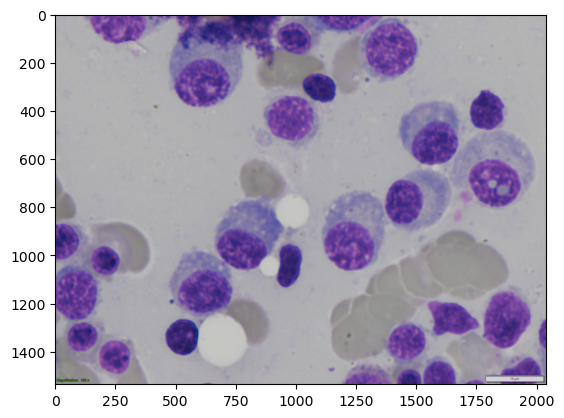

In [7]:
image_path = r"..\..\data\SOTA_segmentation\cell_00068.bmp"
label_path = r"..\..\data\SOTA_segmentation\cell_00068_label.tiff"

image_name = os.path.basename(image_path)
image_name = os.path.splitext(image_name)[0]
print(image_name)

img = io.imread(image_path)
ground_truth = io.imread(label_path)

if (len(img.shape) == 2):
    img = np.expand_dims(img, axis=2)  # Add channel dimension if it's grayscale
    # repeat channels so there is 3
    img = np.repeat(img, 3, axis=2)
# Print image information
print(f"Loaded image shape: {img.shape}, dtype: {img.dtype}")

plt.imshow(img)

## Run cellpose

In [9]:
result = model.eval(img, niter=2000)

## Plot ground truth and cellpose results overlays. 

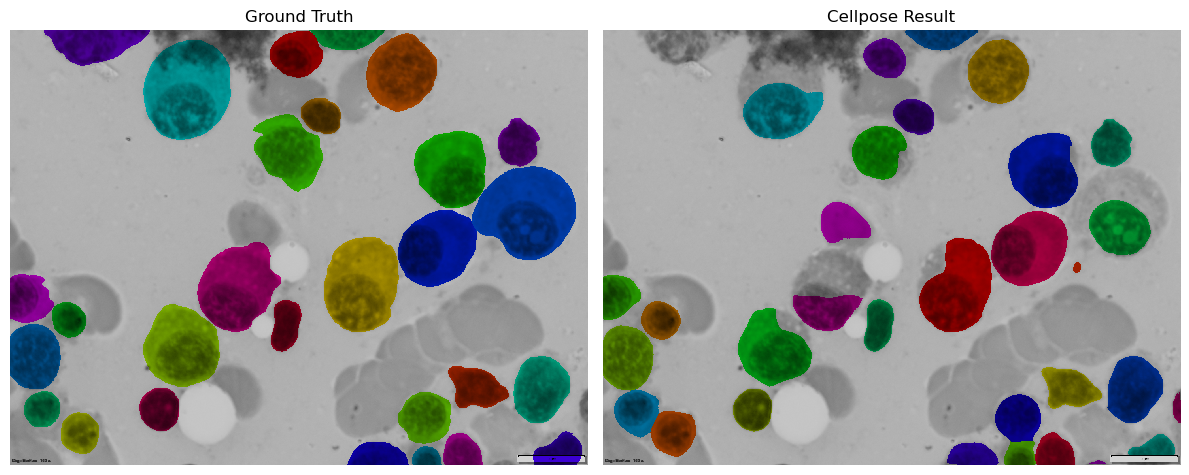

In [10]:
from tnia.plotting.plt_helper import mask_overlay

ground_truth_overlay = mask_overlay(img, ground_truth)
result_overlay = mask_overlay(img, result[0])

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

axes[0].imshow(ground_truth_overlay)
axes[0].set_title('Ground Truth')
axes[0].axis('off')

axes[1].imshow(result_overlay)
axes[1].set_title('Cellpose Result')
axes[1].axis('off')

plt.tight_layout()
plt.show()